In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trapz
from scipy.integrate import simpson as simps

In [2]:
def f(x):
    return 4/(1+x**2)

In [35]:

def mid_point_rule(x1,y1):
    return np.sum(y1*(x1[1]-x1[0]))
def trapezoidal_rule(x1,y1):
    return trapz(x=x1,y=y1)

def simpson_rule(x1,y1):
    return simps(x=x1,y=y1, even=None)


In [4]:
def calculate_errors(x, y, m):
    mid_point_errors = []
    trapezoidal_errors = []
    simpson_errors = []
    for i in range(1, m + 1):
        ab = np.linspace(start=0, stop=1, num=2**i+1)
        yab = f(ab)
        x1=np.array([(ab[i]+ab[i-1])/2 for i in range(1, len(ab))])
        y1=f(x1)
        mid_point_errors.append(np.abs(np.pi - mid_point_rule(x1, y1)))
        trapezoidal_errors.append(np.abs(np.pi - trapezoidal_rule(ab, yab)))
        simpson_errors.append(np.abs(np.pi - simpson_rule(ab, yab)))
    return mid_point_errors, trapezoidal_errors, simpson_errors

In [36]:
a = 0   
b = 1
m = 25
n = np.array([1+(2**i) for i in range(1,m+1)])

mid_point_errors, trapezoidal_errors, simpson_errors = calculate_errors(a, b, m)


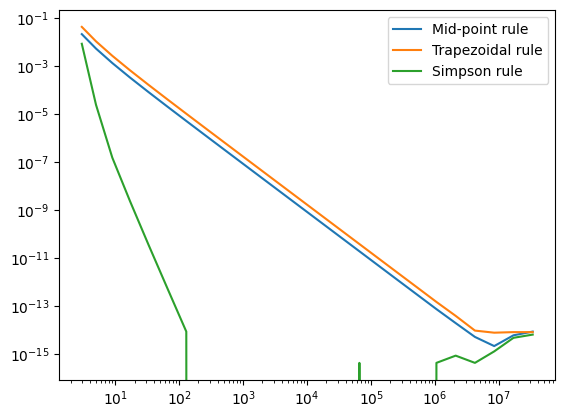

In [50]:

# plt.hlines(y=0, xmin=n[0], xmax=n[-1], colors='aqua', linestyles='-', lw=2, label='zero')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
# plt.vlines(1+(2**22), ymax=0.1, ymin=0, linestyles='dotted', colors='red')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [39]:
#b
from numpy import  argmin


print("Minimal relative errors:")
print(f"Midpoint_rule: {np.format_float_scientific(min(mid_point_errors), precision=3)}, h_val: {1/(2 ** (argmin(mid_point_errors)))}")
print(f"Trapezoid: {np.format_float_scientific(min(trapezoidal_errors), precision=3)}, h_val: {1/(2 ** (argmin(trapezoidal_errors)))}")
print(f"Simpson: {np.format_float_scientific(min(simpson_errors))}, h_val: {1/(2 ** (argmin(simpson_errors)))}")
print(mid_point_errors)
print(trapezoidal_errors)
print(simpson_errors)

Minimal relative errors:
Midpoint_rule: 2.220e-15%, h_val: 2.384185791015625e-07
Trapezoid: 7.994e-15%, h_val: 2.384185791015625e-07
Simpson: 0.e+00%, h_val: 0.0078125
[0.02076028758667725, 0.005207864804149587, 0.001302076001895358, 0.0003255207187669029, 8.138020654335776e-05, 2.0345052055503743e-05, 5.086263020537274e-06, 1.271565755356363e-06, 3.1789143895011307e-07, 7.947285984855057e-08, 1.9868215073159945e-08, 4.9670543234014986e-09, 1.2417635808503746e-09, 3.1044056214568627e-10, 7.761080667023634e-11, 1.9402701667559086e-11, 4.850342349982384e-12, 1.212807632100521e-12, 3.042011087472929e-13, 7.638334409421077e-14, 1.9984014443252818e-14, 5.329070518200751e-15, 2.220446049250313e-15, 6.217248937900877e-15, 8.881784197001252e-15]
[0.04159265358979303, 0.010416183001557222, 0.0026041590987038177, 0.0006510415484042298, 0.00016276041481866343, 4.069010413765284e-05, 1.0172526041074548e-05, 2.543131510268637e-06, 6.357828774561369e-07, 1.5894571925301193e-07, 3.973642970223068e-08

In [7]:
h1 = 1/(2**6+1)
h2 = 1/(2**5+1)
eh1_midpoint = mid_point_errors[5]
eh1_trapz = trapezoidal_errors[5]
eh1_simpson = simpson_errors[5]

eh2_midpoint = mid_point_errors[4]
eh2_trapz = trapezoidal_errors[4]
eh2_simpson = simpson_errors[4]

order_midpoint = np.log(eh2_midpoint/eh1_midpoint)/np.log(h2/h1)
order_trapz = np.log(eh2_trapz/eh1_trapz)/np.log(h2/h1)
order_simpson = np.log(eh2_simpson/eh1_simpson)/np.log(h2/h1)

print("Empiric orders of congervence for all methods:")
print(f"Midpoint method: {order_midpoint:.3f}")
print(f"Trapezoid method: {order_trapz:.3f}")
print(f"Simpson method: {order_simpson:.3f}")

Empiric orders of congervence for all methods:
Midpoint method: 2.045
Trapezoid method: 2.045
Simpson method: 6.135


In [8]:
from numpy.polynomial.legendre import leggauss as gauss


In [9]:
def gauss_legendre_rule(a, b, n):
    x, w = gauss(n)
    return np.sum(w * f((b - a) / 2 * x + (a + b) / 2)/2)

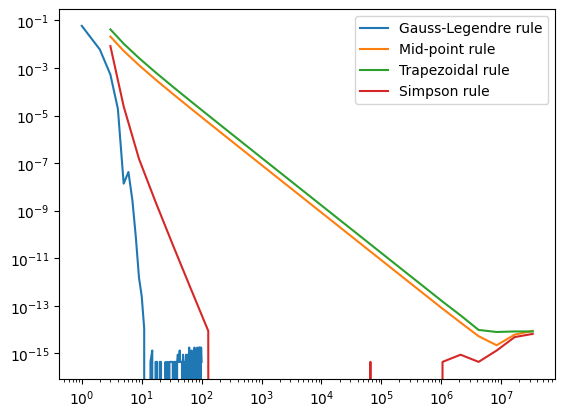

In [10]:
gauss_legendre_errors = np.array([np.abs(np.pi - gauss_legendre_rule(a, b, i)) for i in range(1, 100+1)])
plt.plot(range(1,101), gauss_legendre_errors, label='Gauss-Legendre rule')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()